# Part 1: Text Preprocessing

In [1]:
import nltk
import re
import csv
import pandas as pd

In [2]:
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')

df = pd.read_csv('train.csv')

In [3]:
#STEP 1: LOWERCASE

df = df.sample(10000)
df['Text'] = df['Text'].apply(lambda x: x.lower())
df

,Index,Sentiment,Text
934485,934485,1,http://twitpic.com/5525q - traffic - just love...
726078,726078,0,@bratta @cawake hoping next time i'm not stuck...
372173,372173,0,"@iammenina how infectious can swine flu be, an..."
330889,330889,0,@nefertari224 noooo! i love conan!
291226,291226,0,i'm soooo hungry! it's almosty 2pm and i haven...
...,...,...,...
90393,90393,0,can't believe we havent got #bigweekend as a t...
299398,299398,0,@kimashton you know what's bull? when my last ...
680926,680926,0,@femelle_libre hahahawwww that sucks
550118,550118,0,feeling more at home now then ever...too bad i...


In [4]:
#STEP 2: REMOVE DIGITAL NUMBERS

df['Text'] = df['Text'].apply(lambda x: re.sub('[0-9]', '', x))
df

,Index,Sentiment,Text
934485,934485,1,http://twitpic.com/q - traffic - just love it!
726078,726078,0,@bratta @cawake hoping next time i'm not stuck...
372173,372173,0,"@iammenina how infectious can swine flu be, an..."
330889,330889,0,@nefertari noooo! i love conan!
291226,291226,0,i'm soooo hungry! it's almosty pm and i haven'...
...,...,...,...
90393,90393,0,can't believe we havent got #bigweekend as a t...
299398,299398,0,@kimashton you know what's bull? when my last ...
680926,680926,0,@femelle_libre hahahawwww that sucks
550118,550118,0,feeling more at home now then ever...too bad i...


In [5]:
#STEP 3: DECONTRACTION

df['Text'] = df['Text'].apply(lambda x: re.sub(r"won\'t", "will not", x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r"can\'t", "can not", x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r"n\'t", " not", x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r"\'re", " are", x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r"\'s", " is", x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r"\'d", " would", x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r"\'l", " will", x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r"\'t", " not", x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r"\'ve", " have", x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r"\'m", " am", x))
df

,Index,Sentiment,Text
934485,934485,1,http://twitpic.com/q - traffic - just love it!
726078,726078,0,@bratta @cawake hoping next time i am not stuc...
372173,372173,0,"@iammenina how infectious can swine flu be, an..."
330889,330889,0,@nefertari noooo! i love conan!
291226,291226,0,i am soooo hungry! it is almosty pm and i have...
...,...,...,...
90393,90393,0,can not believe we havent got #bigweekend as a...
299398,299398,0,@kimashton you know what is bull? when my last...
680926,680926,0,@femelle_libre hahahawwww that sucks
550118,550118,0,feeling more at home now then ever...too bad i...


In [6]:
#STEP 4: REMOVE SPECIAL CHARACTERS

def removeSpecial(text):
    # Remove anything that is not a letter or a number
    newText = re.sub('[^A-Za-z0-9 ]+', '', text)
    return newText

df['Text'] = df['Text'].apply(removeSpecial)
df

,Index,Sentiment,Text
934485,934485,1,httptwitpiccomq traffic just love it
726078,726078,0,bratta cawake hoping next time i am not stuck ...
372173,372173,0,iammenina how infectious can swine flu be anyw...
330889,330889,0,nefertari noooo i love conan
291226,291226,0,i am soooo hungry it is almosty pm and i have ...
...,...,...,...
90393,90393,0,can not believe we havent got bigweekend as a ...
299398,299398,0,kimashton you know what is bull when my last l...
680926,680926,0,femellelibre hahahawwww that sucks
550118,550118,0,feeling more at home now then evertoo bad it i...


# Part 2: Linguistic Feature Extraction

In [7]:
#bag of words

from sklearn.feature_extraction.text import CountVectorizer

bagOfWords_model = CountVectorizer()
bagOfWords_vector = bagOfWords_model.fit_transform(df['Text'])
bagOfWords_array = bagOfWords_vector.toarray()

print(bagOfWords_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
#tf*idf

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_model = TfidfVectorizer()
tf_idf_vector = tf_idf_model.fit_transform(df['Text'])
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
#word2vec

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

# load data
sentences = df['Text'].apply(nltk.word_tokenize).tolist()
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = model.wv
vector = word_vectors['hello']
similar_words = word_vectors.most_similar('hello', topn=10)

print(similar_words)

[('haha', 0.9992844462394714), ('here', 0.999273955821991), ('cool', 0.9992738962173462), ('though', 0.9992730021476746), ('who', 0.9992563128471375), ('hey', 0.9992557168006897), ('your', 0.999252200126648), ('also', 0.9992448687553406), ('well', 0.9992399215698242), ('more', 0.9992313385009766)]


# Part 3: Build your Sentiment Classification Model

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [12]:
#preprocess test data

dfTest = pd.read_csv('test.csv')

In [13]:
#STEP 1: LOWERCASE

dfTest['Text'] = dfTest['Text'].apply(lambda x: x.lower())
dfTest

,Index,Sentiment,Text
0,0,1,@stellargirl i loooooooovvvvvveee my kindle2. ...
1,1,1,reading my kindle2... love it... lee childs i...
2,2,1,"ok, first assesment of the #kindle2 ...it fuck..."
3,3,1,@kenburbary you'll love your kindle2. i've had...
4,4,1,@mikefish fair enough. but i have the kindle2...
...,...,...,...
354,492,1,"after using latex a lot, any other typeset mat..."
355,494,0,"on that note, i hate word. i hate pages. i hat..."
356,495,1,ahhh... back in a *real* text editing environm...
357,496,0,"trouble in iran, i see. hmm. iran. iran so far..."


In [14]:
#STEP 2: REMOVE DIGITAL NUMBERS

dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub('[0-9]', '', x))
dfTest

,Index,Sentiment,Text
0,0,1,@stellargirl i loooooooovvvvvveee my kindle. n...
1,1,1,reading my kindle... love it... lee childs is...
2,2,1,"ok, first assesment of the #kindle ...it fucki..."
3,3,1,@kenburbary you'll love your kindle. i've had ...
4,4,1,@mikefish fair enough. but i have the kindle ...
...,...,...,...
354,492,1,"after using latex a lot, any other typeset mat..."
355,494,0,"on that note, i hate word. i hate pages. i hat..."
356,495,1,ahhh... back in a *real* text editing environm...
357,496,0,"trouble in iran, i see. hmm. iran. iran so far..."


In [15]:
#STEP 3: DECONTRACTION

dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub(r"won\'t", "will not", x))
dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub(r"can\'t", "can not", x))
dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub(r"n\'t", " not", x))
dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub(r"\'re", " are", x))
dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub(r"\'s", " is", x))
dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub(r"\'d", " would", x))
dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub(r"\'l", " will", x))
dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub(r"\'t", " not", x))
dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub(r"\'ve", " have", x))
dfTest['Text'] = dfTest['Text'].apply(lambda x: re.sub(r"\'m", " am", x))
dfTest

,Index,Sentiment,Text
0,0,1,@stellargirl i loooooooovvvvvveee my kindle. n...
1,1,1,reading my kindle... love it... lee childs is...
2,2,1,"ok, first assesment of the #kindle ...it fucki..."
3,3,1,@kenburbary you willl love your kindle. i have...
4,4,1,@mikefish fair enough. but i have the kindle ...
...,...,...,...
354,492,1,"after using latex a lot, any other typeset mat..."
355,494,0,"on that note, i hate word. i hate pages. i hat..."
356,495,1,ahhh... back in a *real* text editing environm...
357,496,0,"trouble in iran, i see. hmm. iran. iran so far..."


In [16]:
#STEP 4: REMOVE SPECIAL CHARACTERS

def removeSpecial(text):
    # Remove anything that is not a letter or a number
    newText = re.sub('[^A-Za-z0-9 ]+', '', text)
    return newText

dfTest['Text'] = dfTest['Text'].apply(removeSpecial)
dfTest

,Index,Sentiment,Text
0,0,1,stellargirl i loooooooovvvvvveee my kindle not...
1,1,1,reading my kindle love it lee childs is good ...
2,2,1,ok first assesment of the kindle it fucking rocks
3,3,1,kenburbary you willl love your kindle i have h...
4,4,1,mikefish fair enough but i have the kindle an...
...,...,...,...
354,492,1,after using latex a lot any other typeset math...
355,494,0,on that note i hate word i hate pages i hate l...
356,495,1,ahhh back in a real text editing environment i...
357,496,0,trouble in iran i see hmm iran iran so far awa...


In [17]:
#LINEAR REGRESSION

#BAG OF WORDS
X_trainBAG = tf_idf_vector
X_testBAG = tf_idf_model.transform(dfTest['Text'])
y_trainBAG = df['Sentiment'].values
y_testBAG = dfTest['Sentiment'].values

lcBAG = LogisticRegression(max_iter=200000)
lcBAG.fit(X_trainBAG, y_trainBAG)

y_lc_predictedBAG = lcBAG.predict(X_testBAG)
y_lc_pred_probaBAG = lcBAG.predict_proba(X_testBAG)


#TF*IDF
X_train_tfidf = tf_idf_vector
X_test_tfidf = tf_idf_model.transform(dfTest['Text'])
y_train_tfidf = df['Sentiment'].values
y_test_tfidf = dfTest['Sentiment'].values

lcTFIDF = LogisticRegression(max_iter=100000)
lcTFIDF.fit(X_train_tfidf, y_train_tfidf)

y_lc_predictedTFIDF = lcTFIDF.predict(X_test_tfidf)
y_lc_pred_probaTFIDF = lcTFIDF.predict_proba(X_test_tfidf)

In [18]:
## GAUSSIAN NAIVE-BAYES

#BAG OF WORDS

nbcBAG = GaussianNB()
nbcBAG.fit(X_trainBAG.toarray(), y_trainBAG)

y_nbc_predictedBAG = nbcBAG.predict(X_testBAG.toarray())
y_nbc_pred_probaBAG = nbcBAG.predict_proba(X_testBAG.toarray())


#TF*IDF

nbcTFIDF = GaussianNB()
nbcTFIDF.fit(X_train_tfidf.toarray(), y_train_tfidf)

y_nbc_predictedTFIDF = nbcTFIDF.predict(X_test_tfidf.toarray())
y_nbc_pred_probaTFIDF = nbcTFIDF.predict_proba(X_test_tfidf.toarray())

--------------------------------------------------------

Logistic Regression Bag-of-Words Classification Report

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       177
           1       0.90      0.30      0.45       182

    accuracy                           0.63       359
   macro avg       0.74      0.63      0.59       359
weighted avg       0.74      0.63      0.58       359

--------------------------------------------------------

Logistic Regression TF*IDF Classification Report

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       177
           1       0.90      0.30      0.45       182

    accuracy                           0.63       359
   macro avg       0.74      0.63      0.59       359
weighted avg       0.74      0.63      0.58       359

--------------------------------------------------------

Gaussian Naive-Bayes Bag-of-Words Classification Report

         

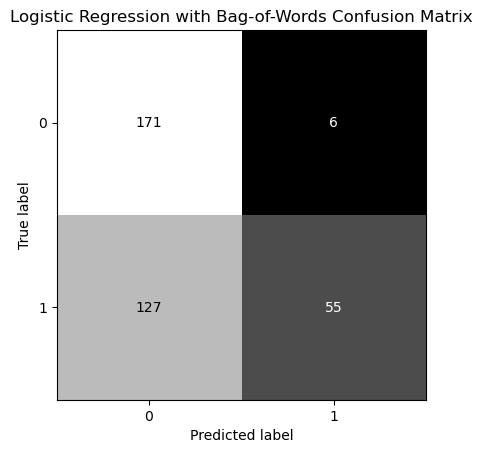

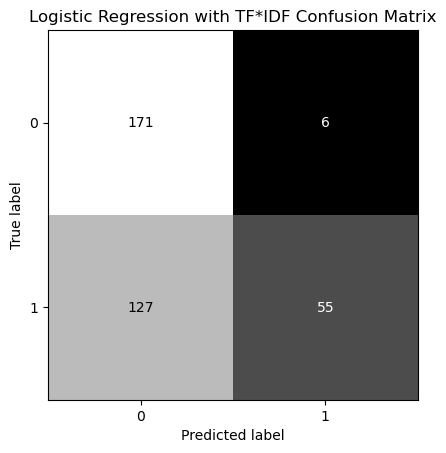

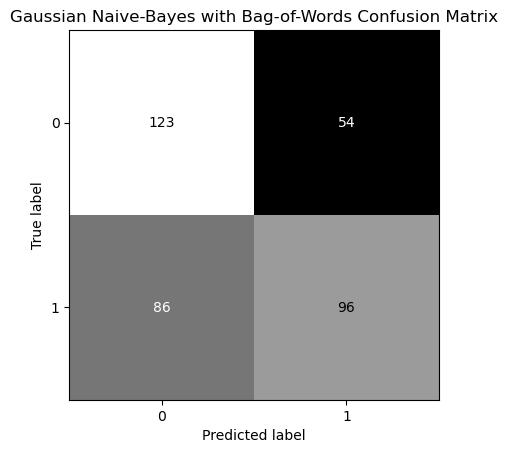

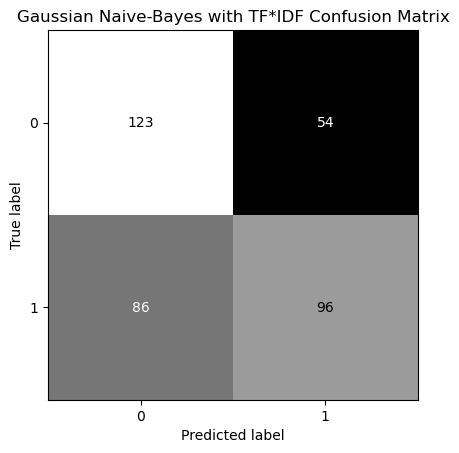

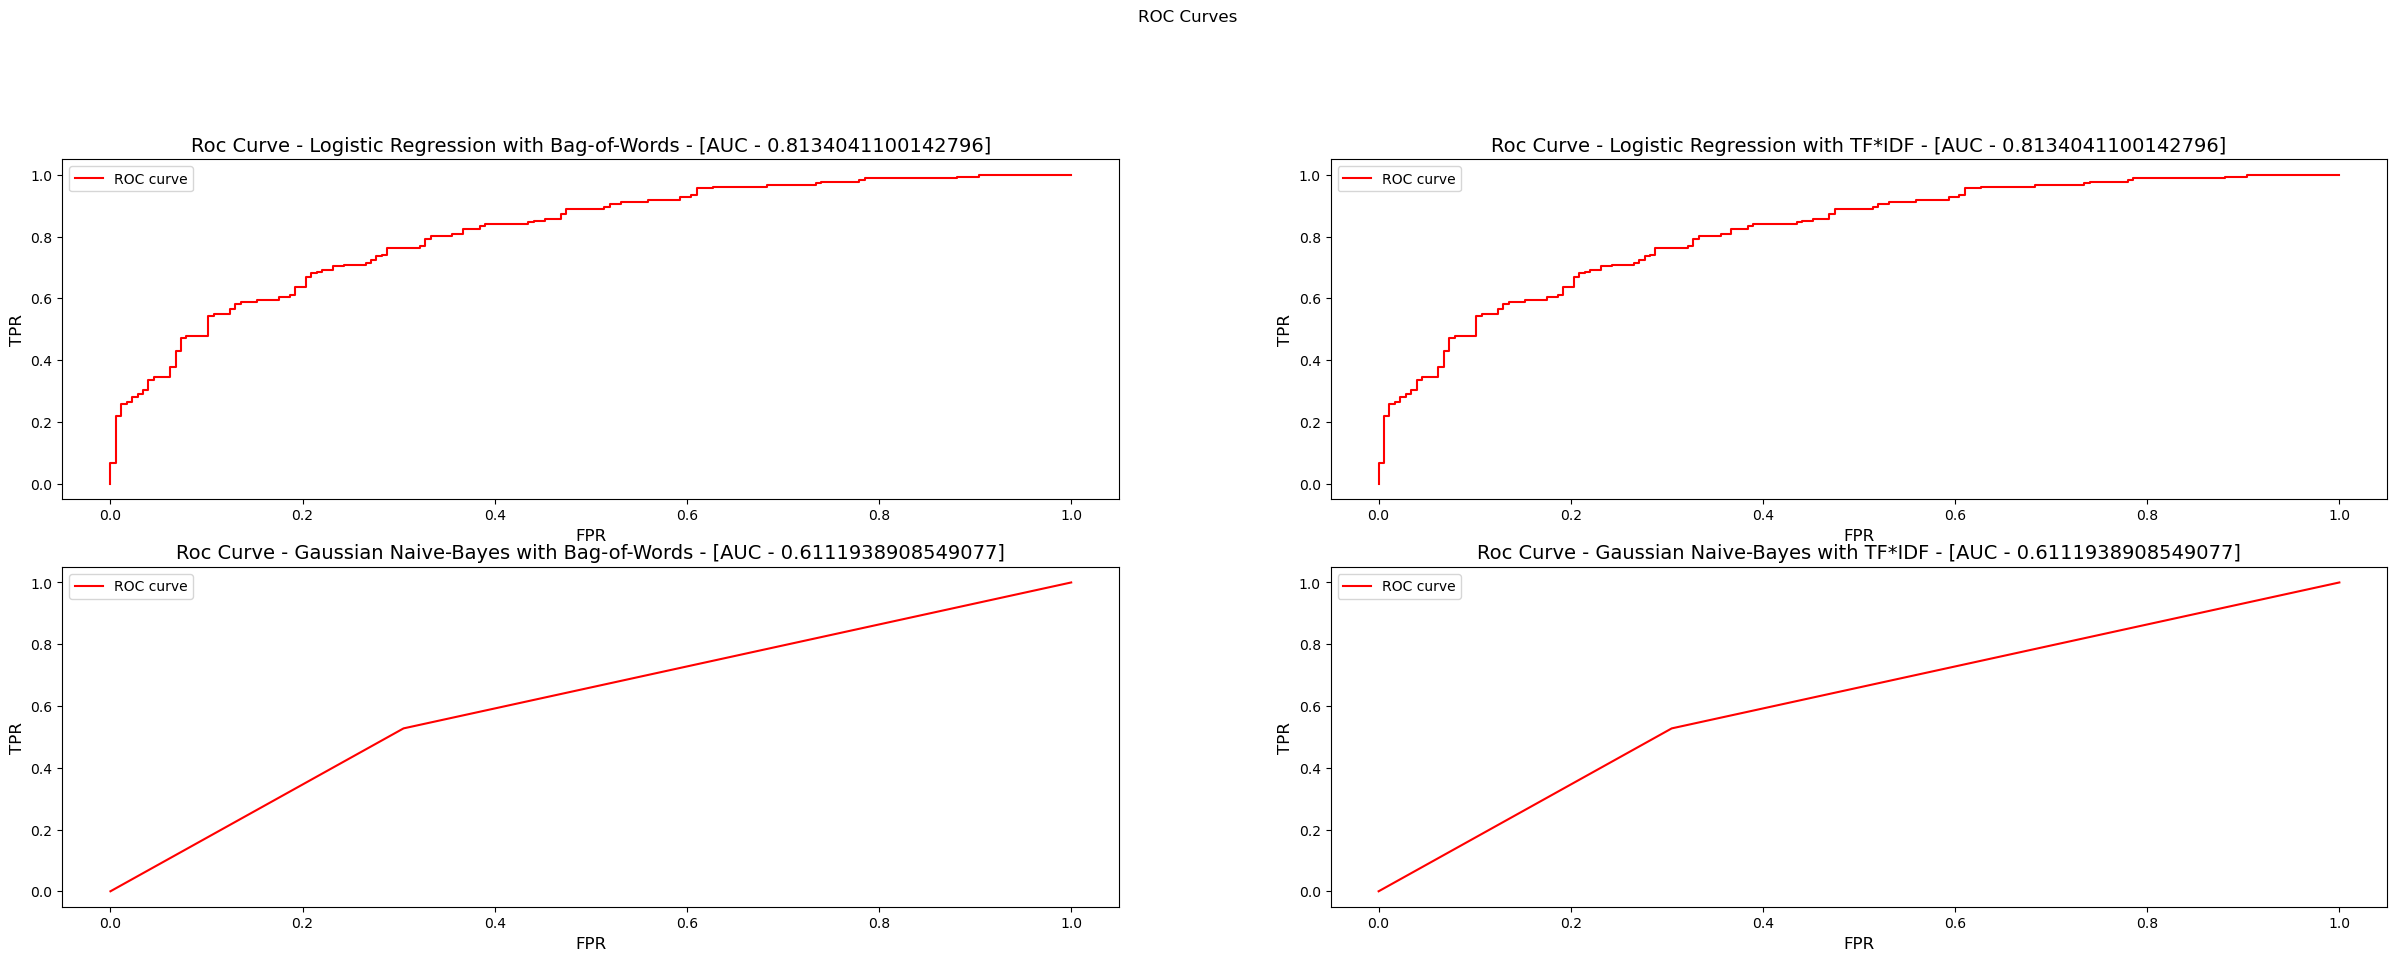

In [22]:
import matplotlib.pyplot as plt
print("--------------------------------------------------------\n")
print("Logistic Regression Bag-of-Words Classification Report\n")
print(classification_report(y_testBAG, y_lc_predictedBAG))
print("--------------------------------------------------------\n")
print("Logistic Regression TF*IDF Classification Report\n")
print(classification_report(y_test_tfidf, y_lc_predictedTFIDF))
print("--------------------------------------------------------\n")
print("Gaussian Naive-Bayes Bag-of-Words Classification Report\n")
print(classification_report(y_testBAG, y_nbc_predictedBAG))
print("--------------------------------------------------------\n")
print("Gaussian Naive-Bayes TF*IDF Classification Report\n")
print(classification_report(y_test_tfidf, y_nbc_predictedTFIDF))
print("--------------------------------------------------------\n")

models = ['Logistic Regression with Bag-of-Words', 'Logistic Regression with TF*IDF', 'Gaussian Naive-Bayes with Bag-of-Words', 'Gaussian Naive-Bayes with TF*IDF']
predictions = [y_lc_predictedBAG, y_lc_predictedTFIDF, y_nbc_predictedBAG, y_nbc_predictedTFIDF]
pred_probabilities = [y_lc_pred_probaBAG, y_lc_pred_probaTFIDF, y_nbc_pred_probaBAG, y_nbc_pred_probaTFIDF]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_testBAG.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test_tfidf, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()